Se Importan las Librerias

In [113]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
%matplotlib inline

Se accede al dataset y se muestra

In [114]:
data_score = r"C:\Users\VICTUS\Desktop\5tosemestre\IA\Parciales\dataset_link_phishing.csv"
data_score_df = pd.read_csv(data_score)
data_score_df2 = pd.read_csv(data_score)
print(data_score_df.shape)
display(data_score_df.head())

(19431, 87)


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_7420\2948523169.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  data_score_df = pd.read_csv(data_score)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_7420\2948523169.py:3: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  data_score_df2 = pd.read_csv(data_score)


,Unnamed: 0,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,3,http://www.jp519.com/,21,13,0,2,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


Se eliminan columas innecesarios y se convierten a numericas todas las columnas

In [115]:
X = data_score_df.drop(columns=['Unnamed: 0', 'url', 'status'])  # Ajusta si tus columnas son distintas
X = X.replace({'zero': 0, 'one': 1, 'false': 0, 'true': 1,'One': 1, 'Zero': 0, 'False': 0, 'True': 1})

Se normalizan los dato y se aplica PCA para reducir la dimensionalidad

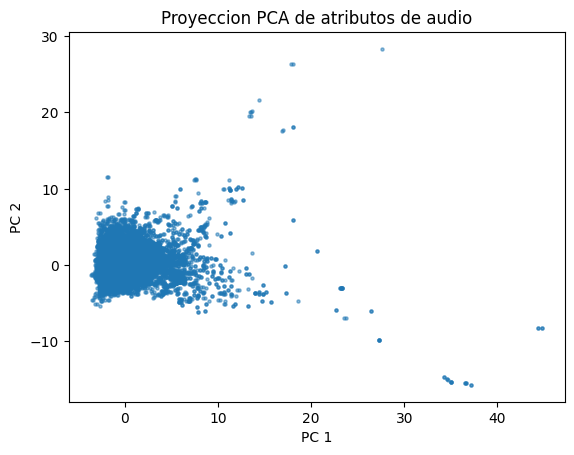

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Graficamos
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.5)
plt.title('Proyeccion PCA de atributos de audio')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

Se grafica el codo y la silueta

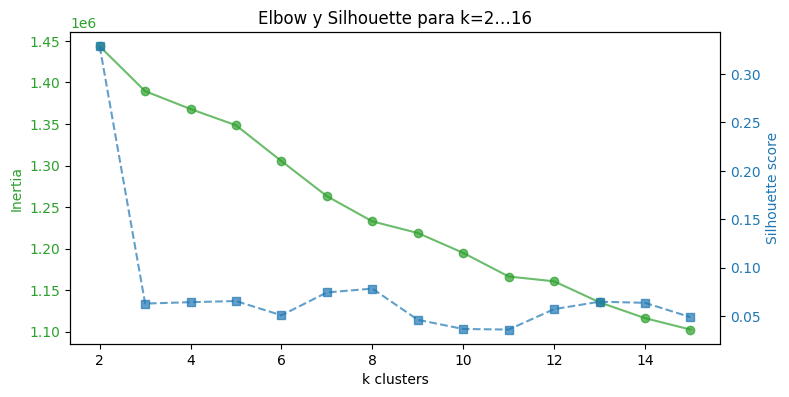

In [ ]:
from sklearn.metrics import silhouette_score

k = range(2, 16)
inertias = []
silhouette_scores = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
# Grafica
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(k, inertias, 'o-', label='Inertia (elbow)', color='C2', alpha=0.7)
ax1.set_xlabel('k clusters')
ax1.set_ylabel('Inertia', color='C2')
ax1.tick_params(axis='y', labelcolor='C2')

ax2 = ax1.twinx()
ax2.plot(k, silhouette_scores, 's--', label='Silhouette', color='C0', alpha=0.7)
ax2.set_ylabel('Silhouette score', color='C0')
ax2.tick_params(axis='y', labelcolor='C0')

fig.tight_layout()
plt.title('Elbow y Silhouette para k=2…16')
plt.show()

Se extrae el mejor número de clusters por medio de la métrica del codo y el silhouette score. En este caso, se elige k=5 y k=2

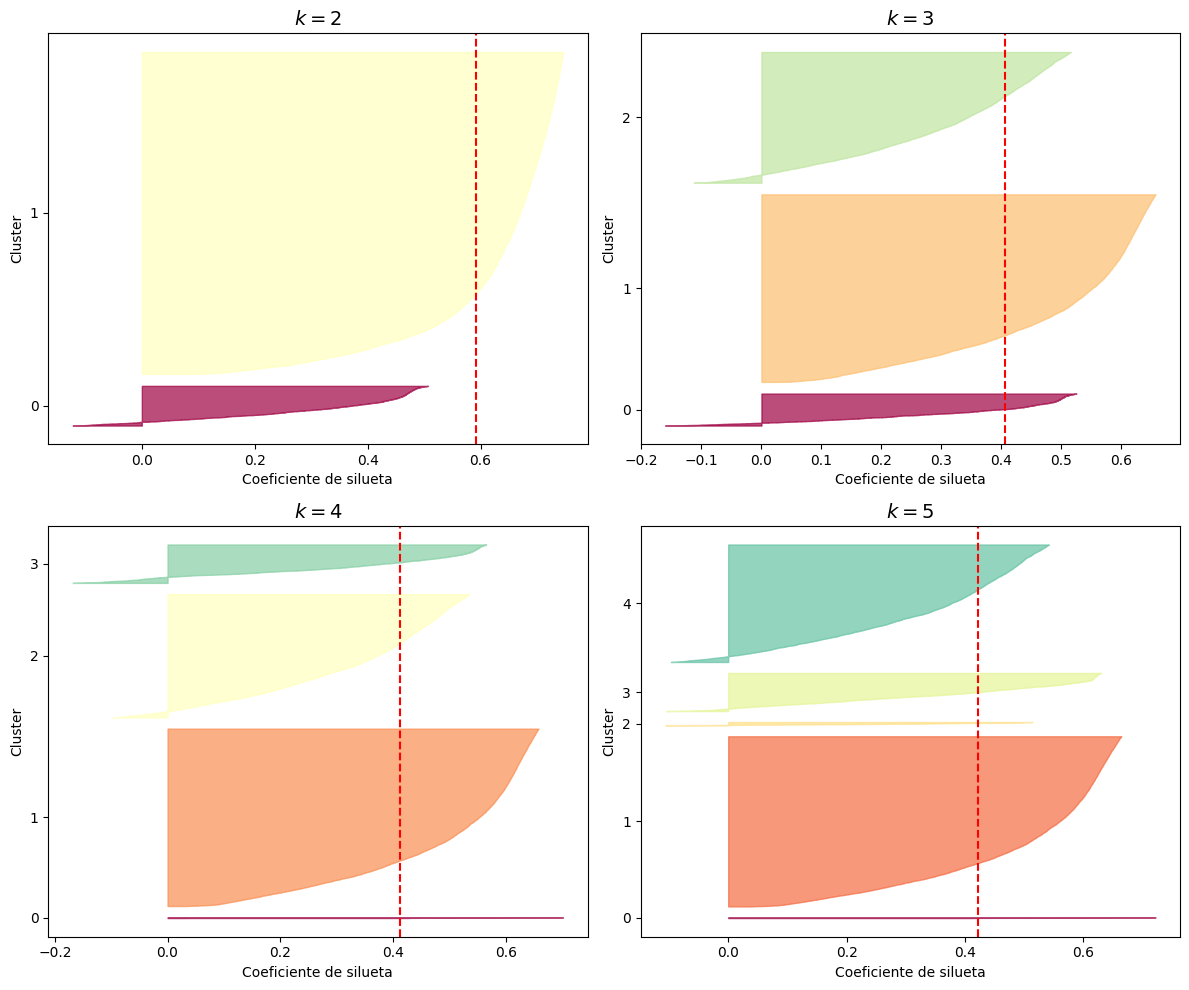

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

kmeans_per_k = {}
silhouette_scores = []
K = range(2, 6)  # k de 6 a 9

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', algorithm="elkan")
    y_pred = kmeans.fit_predict(X_pca)  # O usa X_scaled si no estás usando PCA
    kmeans_per_k[k] = kmeans
    silhouette_scores.append(silhouette_score(X_pca, y_pred))


import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np

plt.figure(figsize=(12, 10))

for i, k in enumerate(K):
    plt.subplot(2, 2, i + 1)

    y_pred = kmeans_per_k[k].labels_
    silhouette_coefficients = silhouette_samples(X_pca, y_pred)

    padding = len(X_pca) // 30
    pos = padding
    ticks = []
    for cluster in range(k):
        coeffs = silhouette_coefficients[y_pred == cluster]
        coeffs.sort()

        color = mpl.cm.Spectral(cluster / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.axvline(x=silhouette_scores[i], color="red", linestyle="--")
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    plt.title(f"$k={k}$", fontsize=14)
    plt.xlabel("Coeficiente de silueta")
    plt.ylabel("Cluster")

plt.tight_layout()
plt.show()



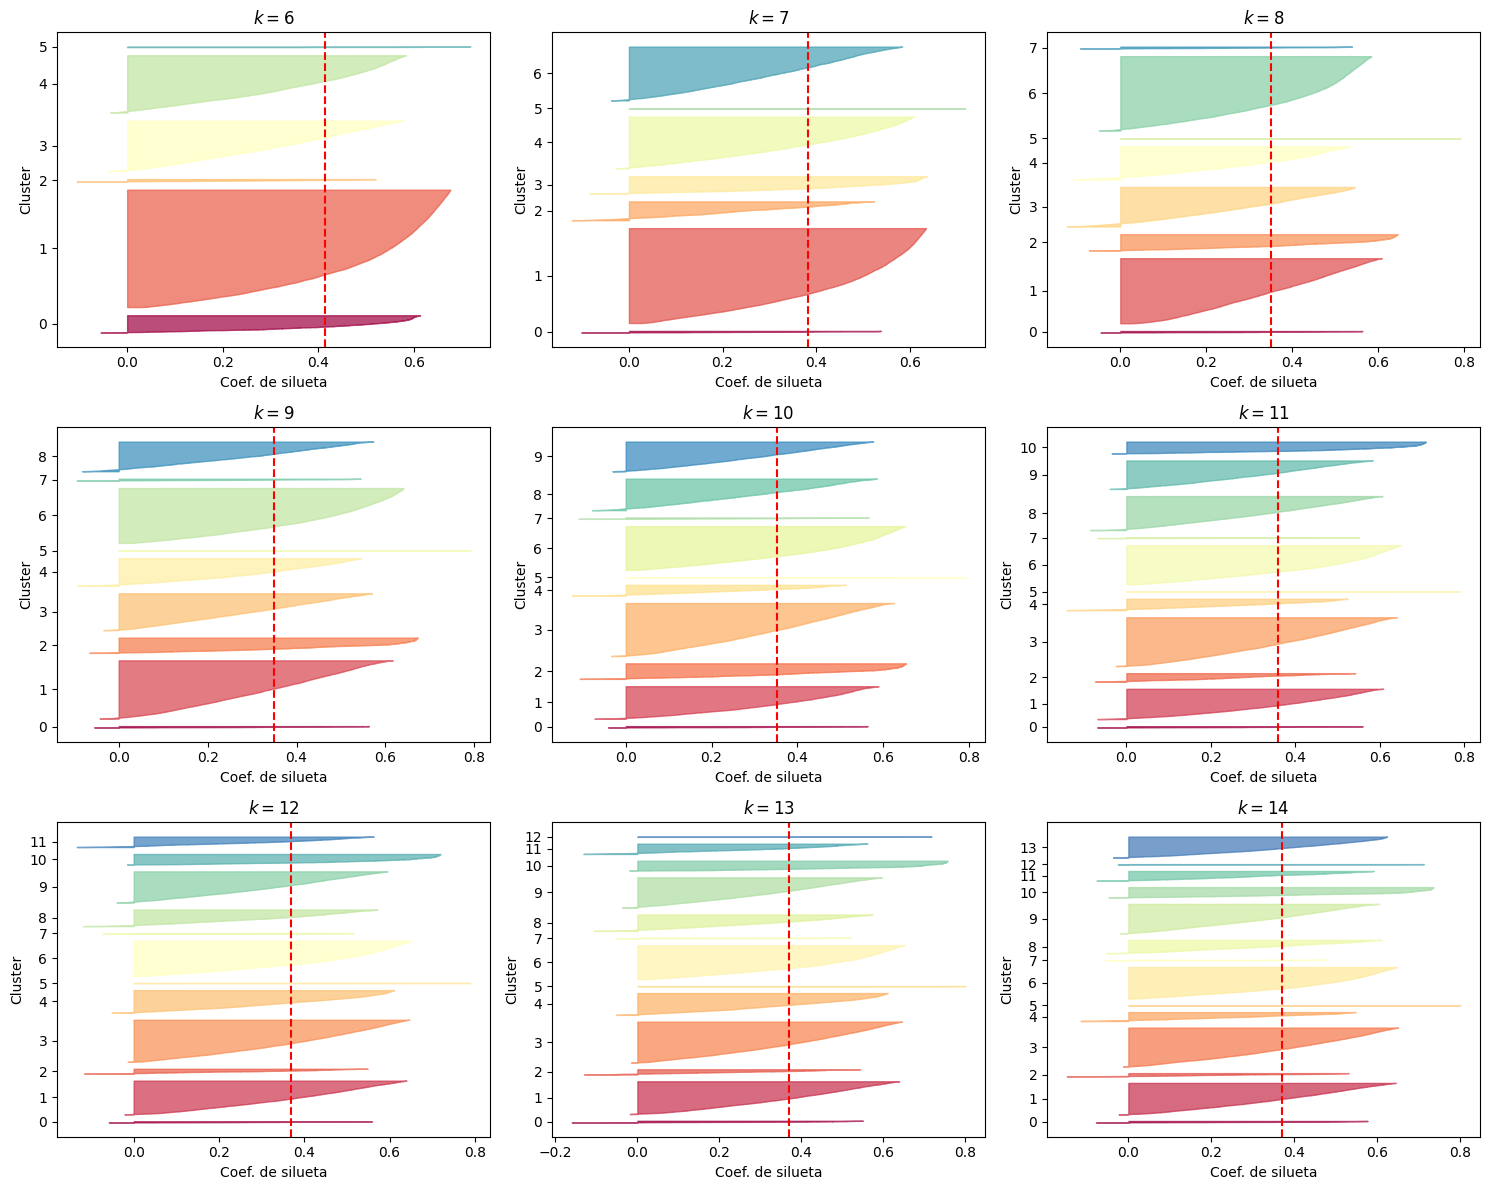

In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np

# Rango actualizado: del 6 al 15
K = range(6, 15)
kmeans_per_k = {}
silhouette_scores = []

# Entrenamiento y cálculo del Silhouette Score
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    y_pred = kmeans.fit_predict(X_pca)  # o usa X_scaled si prefieres
    kmeans_per_k[k] = kmeans
    silhouette_scores.append(silhouette_score(X_pca, y_pred))

# Dibujar 9 subplots (3x3)
plt.figure(figsize=(15, 12))

for i, k in enumerate(K):
    plt.subplot(3, 3, i + 1)

    y_pred = kmeans_per_k[k].labels_
    silhouette_coefficients = silhouette_samples(X_pca, y_pred)

    padding = len(X_pca) // 30
    pos = padding
    ticks = []
    for cluster in range(k):
        coeffs = silhouette_coefficients[y_pred == cluster]
        coeffs.sort()

        color = mpl.cm.Spectral(cluster / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.axvline(x=silhouette_scores[i], color="red", linestyle="--")
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.title(f"$k={k}$", fontsize=12)
    plt.xlabel("Coef. de silueta")
    plt.ylabel("Cluster")

plt.tight_layout()
plt.show()

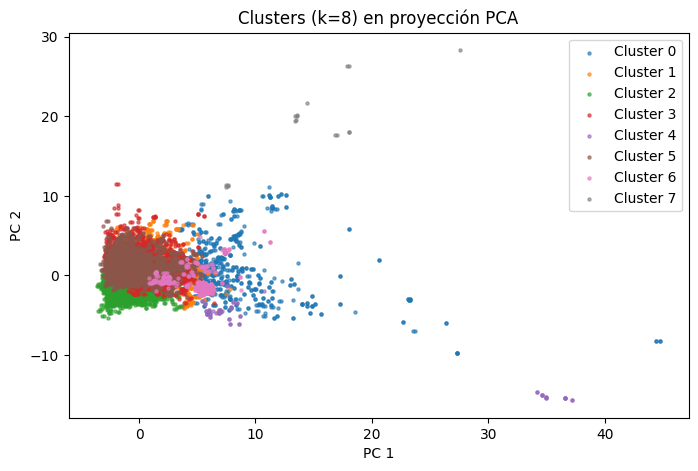

In [122]:
k_opt = 8
kmeans = KMeans(n_clusters=k_opt, random_state=42).fit(X_scaled)
labels = kmeans.labels_
data_score_df['Cluster'] = labels

# Visualizacion en el espacio PCA
plt.figure(figsize=(8,5))
for cid in range(k_opt):
    mask = (labels == cid)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                s=5, alpha=0.6, label=f'Cluster {cid}')
plt.legend(loc='best')
plt.title(f'Clusters (k={k_opt}) en proyección PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

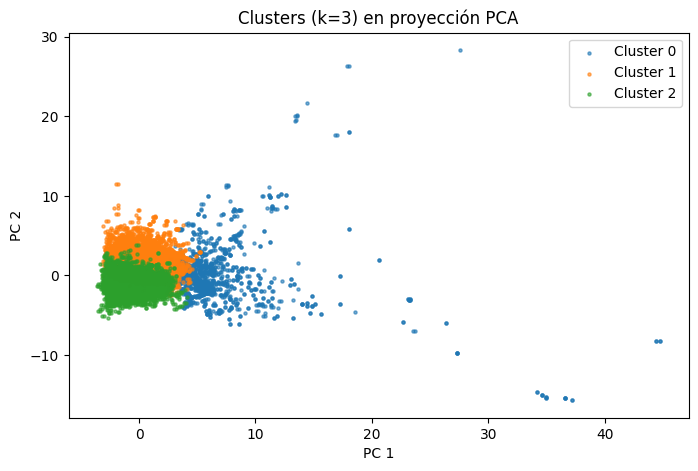

In [133]:
k_opt2 = 3
kmeans2 = KMeans(n_clusters=k_opt2, random_state=42).fit(X_scaled)
labels2 = kmeans2.labels_
data_score_df2['Cluster'] = labels2

# Visualizacion en el espacio PCA
plt.figure(figsize=(8,5))
for cid in range(k_opt2):
    mask = (labels2 == cid)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                s=5, alpha=0.6, label=f'Cluster {cid}')
plt.legend(loc='best')
plt.title(f'Clusters (k={k_opt2}) en proyección PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [124]:
for cid in range(k_opt):
    print(f"\n===Cluster {cid} ===")
    display(
        data_score_df[data_score_df['Cluster']==cid]
            [['url', 'url_length', 'hostname_length', 'ip', 'total_of@',
    'total_of?', 'https_token', 'ratio_digits_url', 'punycode', 
    'random_domain', 'shortening_service', 'nb_redirection',
    'length_words_raw', 'phish_hints', 'login_form', 'external_favicon',
    'popup_window', 'iframe', 'domain_registration_length', 
    'domain_age', 'web_traffic', 'dns_record', 'google_index', 
    'page_rank', 'status']]
            .sample(10, random_state=42)
    )


===Cluster 0 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
18430,http://zaimlimit.ru/wp-content/themes/bin/Well...,228,12,1,0,1,1,0.385965,0,0,...,1,0,0,329,36,0,0,1,0,phishing
8781,http://www.jreg99.com/vendor/phpunit/phpunit/s...,439,14,1,0,1,1,0.530752,0,1,...,0,0,0,1063,-1,0,0,1,0,phishing
1832,https://fr.chromeproxy.net/direct/aHR0cHM6Ly93...,202,18,0,0,0,0,0.118812,0,0,...,0,0,0,309,2612,0,0,1,2,phishing
9456,https://dzd.rksmb.org/conf07/--/https:/www2.ne...,199,13,1,0,1,0,0.195980,0,0,...,1,0,0,184,4564,7504096,0,1,4,phishing
2725,http://78.143.96.35/wordpress/gam/index.php?bi...,206,12,1,0,1,1,0.174757,0,0,...,1,0,0,0,-1,0,1,1,0,phishing
10557,http://stereovision.biz/kanebagtarp/4345a7b9-9...,202,16,1,0,1,1,0.178218,0,0,...,1,0,0,0,6868,6728303,0,1,2,phishing
8515,http://u10084924.ct.sendgrid.net/ls/click?upn=...,409,25,1,0,1,1,0.202934,0,0,...,1,0,0,271,4112,7751,0,1,4,phishing
10059,http://kongrespdgi.com/asset/ajax/onlin/WellsE...,237,15,1,0,1,1,0.371308,0,0,...,0,0,0,125,241,0,0,1,0,phishing
9367,http://9aJbJO5llopcZRHvfr7hHdr7VLKKxRmZqT64VWR...,143,64,1,0,1,1,0.041958,0,1,...,0,0,0,94,7211,0,0,1,2,phishing
17926,https://mail2.mclink.it/SRedirect/www.paypal.c...,466,15,1,0,1,0,0.165236,0,0,...,1,0,0,27,7708,1416447,0,1,5,phishing



===Cluster 1 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
12570,https://usnepalonline.com/mega.php?dir=prime&t...,77,17,1,0,1,0,0.064935,0,0,...,0,0,0,132,4617,9654314,0,1,4,phishing
9042,http://23.4.43.27/mobile.php,28,10,1,0,0,1,0.250000,0,0,...,0,0,0,0,-1,0,1,1,0,phishing
3680,http://www.encarnacionhurtado.com/img/,38,26,0,0,0,1,0.000000,0,0,...,0,0,0,287,4460,0,0,1,2,phishing
12683,https://1drv.ms/b/s!Ajv7gwkdOvZdaTlPYfNUHg_IdPM,47,7,1,0,0,0,0.042553,0,1,...,0,0,0,35,2521,632751,0,1,7,phishing
4841,http://hostpoint.ch.hebetec.ch.p2aexpertise.co...,67,40,1,0,0,1,0.283582,0,0,...,0,0,0,360,2561,0,0,1,0,phishing
5624,https://downloadwebfile.burrow.io/sign-in/mail...,50,25,0,0,0,0,0.000000,0,0,...,0,0,0,119,2072,1573850,0,1,4,phishing
2014,https://1drv.ms/w/s!At6aBCMxoQeQgRRAHazJu3fO1Ojj,48,7,0,0,0,0,0.083333,0,1,...,0,0,0,35,2521,632751,0,1,7,phishing
12837,http://www.arlberg-skifuehrer.com/06BFE1092A06...,67,26,1,0,0,1,0.313433,0,0,...,0,0,0,74,5770,0,0,1,2,phishing
16484,https://cran.r-project.org/web/packages/tm/vig...,59,18,1,0,0,0,0.000000,0,0,...,0,0,0,1192,7573,7471,0,0,5,legitimate
19404,http://apuwa.com/blog/profile/name.html,39,9,1,0,0,1,0.000000,0,0,...,0,0,0,1072,2215,6256656,0,1,2,phishing



===Cluster 2 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
18159,https://en.wikipedia.org/wiki/Public_domain,43,16,1,0,0,0,0.000000,0,0,...,0,0,0,905,7130,12,0,0,7,legitimate
2539,http://global.ncsoft.com/global/,32,17,0,0,0,1,0.000000,0,0,...,0,0,0,383,9113,29935,0,0,5,legitimate
7223,https://wh494528.ispot.cc/updateaddress.php,43,17,0,0,0,0,0.139535,0,0,...,0,0,0,91,2101,124276,0,0,0,phishing
3684,https://www.lampeguru.dk/,25,16,0,0,0,0,0.000000,0,0,...,0,0,0,402,3624,699776,0,0,3,legitimate
1121,http://www.pcmag.com/reviews/mp3-players,40,13,0,0,0,1,0.025000,0,1,...,1,0,0,1831,9226,771,0,1,6,legitimate
15981,https://www.dewilgo.de/,23,14,1,0,0,0,0.000000,0,0,...,1,0,0,0,-1,1342598,0,0,2,legitimate
16044,https://www.iplocation.net/subnet-calculator,44,18,1,0,0,0,0.000000,0,0,...,0,0,0,1479,5095,11056,0,0,5,legitimate
12744,http://www.dictionary.com/browse/segmented,42,18,1,0,0,1,0.000000,0,0,...,0,0,0,296,9202,684,0,0,6,legitimate
7434,https://www.tritonwear.com/,27,18,0,0,0,0,0.000000,0,0,...,0,0,0,316,2241,4289979,0,0,3,legitimate
1019,http://amazon-vtech-safe-and-sound-audio.buy.m...,76,47,0,0,0,1,0.000000,0,1,...,0,0,0,568,-1,0,0,1,2,legitimate



===Cluster 3 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
16260,https://eddimonster.com/wordp/theteam/planis/s...,60,15,1,0,0,0,0.000000,0,0,...,0,0,0,305,60,7866174,0,1,0,phishing
5572,http://justlookapp.com/blog/wp-content/themes/...,103,15,1,0,0,1,0.194175,0,0,...,0,0,0,145,2047,0,0,1,0,phishing
10741,http://mms.tucsonhispanicchamber.net/members/s...,94,29,1,0,1,1,0.095745,0,0,...,1,0,0,295,800,7399431,0,1,0,phishing
4000,http://scom2016.com/adobes/999ae4fcb5b2e97ec36...,60,12,1,0,0,1,0.366667,0,0,...,0,0,0,389,2532,0,0,1,0,phishing
4063,http://naturalwireless.com/,27,19,0,0,0,1,0.000000,0,0,...,0,0,0,596,6344,2108905,0,0,2,legitimate
9172,http://www.netciti.id/pdf/O/login.php?l=_JeHFU...,73,14,1,0,1,1,0.150685,0,0,...,0,0,0,326,2231,0,0,1,0,phishing
16966,https://www.apacessltaupersonalit.com/home.php,46,29,1,0,0,0,0.000000,0,0,...,0,0,0,323,42,0,0,1,0,phishing
1991,http://antaresns.com/We-transfer/login.php,42,13,0,0,0,1,0.000000,0,0,...,1,0,0,254,477,0,0,1,0,phishing
10226,http://authorcheck.com/assets/deleteme/Dropbox...,79,15,1,0,0,1,0.101266,0,0,...,1,0,0,306,3347,0,0,1,2,phishing
18794,http://mintandchopsticks.com/wp-includes/image...,67,21,1,0,0,1,0.000000,0,0,...,1,0,0,290,2996,0,0,1,0,phishing



===Cluster 4 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
16239,http://106.12.192.247/,22,14,1,0,0,1,0.500000,0,0,...,0,0,0,0,-1,0,1,0,0,phishing
18549,http://178.33.67.12/,20,12,1,0,0,1,0.450000,0,0,...,1,0,0,0,-1,0,1,0,0,phishing
857,http://106.12.192.247/,22,14,1,0,0,1,0.500000,0,0,...,0,0,0,0,-1,0,1,0,0,phishing
12870,http://35.188.36.185/linkedin/www.linkedin.com...,54,13,1,0,0,1,0.185185,0,0,...,1,0,0,0,-1,0,1,1,0,phishing
2765,http://87.138.95.150:8080/index.php,35,13,0,0,0,1,0.400000,0,0,...,0,0,0,0,-1,0,1,1,0,phishing
9275,http://174.139.46.123/ap/signin?key=a@b.c&open...,396,14,1,1,2,1,0.047980,0,0,...,1,0,0,0,-1,0,1,1,0,phishing
4604,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,1,1,1,0.085954,0,0,...,1,0,0,0,-1,0,1,1,0,phishing
3849,http://68.178.252.148/,22,14,1,0,0,1,0.500000,0,0,...,0,0,0,0,-1,0,1,1,0,phishing
7044,http://98.126.214.77/ap/signin?openid.pape.max...,476,13,1,1,1,1,0.084034,0,0,...,1,0,0,0,-1,0,1,1,0,phishing
19134,http://185.17.106.194/wp-includes/dropbox/drop...,50,14,1,0,0,1,0.220000,0,0,...,0,0,0,0,-1,0,1,1,0,phishing



===Cluster 5 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11325,http://kakakakaka-986ff.ts.r.appspot.com/wp-co...,63,33,1,0,0,1,0.047619,0,0,...,1,0,0,228,5615,0,0,1,5,phishing
11540,https://dilaraflanders509.wordpress.com/2012/0...,104,31,1,0,0,0,0.115385,0,0,...,1,0,0,586,7449,6951049,0,1,8,legitimate
9176,https://drive.google.com/open?id=1wGUuehObhMvS...,66,16,1,0,1,0,0.090909,0,0,...,1,0,0,2974,8348,1,0,0,10,phishing
7638,http://elexusbetgirissitemiz.blogspot.com,41,34,0,0,0,1,0.000000,0,0,...,1,0,0,374,7295,0,0,1,5,phishing
10870,http://betasus23.blogspot.com,29,22,1,0,0,1,0.068966,0,0,...,1,0,0,374,7295,0,0,1,5,phishing
2648,http://serviceunit3.myfreesites.net/,36,28,0,0,0,1,0.027778,0,0,...,1,0,0,241,1950,341948,0,1,1,phishing
855,https://docs.google.com/forms/d/e/1FAIpQLSfvhI...,99,15,0,0,0,0,0.111111,0,0,...,1,0,0,2975,8347,1,0,1,10,phishing
13506,http://www.hangthebankers.com/cnn-trump-assass...,73,22,1,0,0,1,0.000000,0,0,...,1,0,0,224,3063,795194,0,1,5,legitimate
9178,https://forms.office.com/Pages/ResponsePage.as...,132,16,1,0,1,0,0.037879,0,0,...,1,0,0,271,7765,32,0,0,5,phishing
4357,http://user7770001255.el.r.appspot.com/ver.html,47,31,1,0,0,1,0.212766,0,0,...,1,0,0,228,5616,0,0,1,5,phishing



===Cluster 6 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
9117,https://support-appleld.com.secureupdate.duila...,126,50,1,0,1,0,0.111111,0,0,...,0,0,0,25,3993,5707171,0,1,0,phishing
13876,http://secureupdate.appleld.com.duilawyeryork....,68,42,1,0,0,1,0.191176,0,0,...,0,0,0,25,3992,5697976,0,1,0,phishing
16111,http://secureupdate.appleld.com.duilawyeryork....,68,42,1,0,0,1,0.147059,0,0,...,0,0,0,15,4003,5816617,0,1,0,phishing
866,http://paypal.com.0.security-confirmation.3408...,85,77,1,0,0,1,0.294118,0,0,...,0,0,0,273,-1,0,0,1,0,phishing
11436,http://support-appleld.com.secureupdate.duilaw...,126,50,1,0,1,1,0.174603,0,0,...,0,0,0,25,3992,5697976,0,1,0,phishing
11271,https://support-appleld.com.secureupdate.duila...,125,50,1,0,1,0,0.136000,0,0,...,0,0,0,25,3993,5707171,0,1,0,phishing
1505,http://secureupdate.appleld.com.duilawyeryork....,68,42,1,0,0,1,0.161765,0,0,...,0,0,0,14,4003,5816617,0,1,0,phishing
2851,http://visa.com-vmore-4636967280.imagelinetech...,51,43,1,0,0,1,0.196078,0,0,...,1,0,0,409,3243,0,0,1,0,phishing
7049,https://www.support-appleld.com.secureupdate.d...,132,54,1,0,1,0,0.143939,0,0,...,0,0,0,14,4003,5816617,0,1,0,phishing
12961,https://support-appleld.com.secureupdate.duila...,128,50,1,0,1,0,0.148438,0,0,...,0,0,0,25,3993,5707171,0,1,0,phishing



===Cluster 7 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
2778,https://fr.imsly.com/direct/aHR0cHM6Ly93d3cuZm...,260,12,0,0,0,0,0.119231,0,0,...,0,0,0,146,4967,0,0,1,1,phishing
3929,http://fr.imsly.com/direct/aHR0cHM6Ly93d3cuZmF...,259,12,0,0,0,1,0.119691,0,0,...,0,0,0,146,4967,0,0,1,1,phishing
7548,https://www.helpdesk-tech.com/signin?t=eyJhbGc...,611,21,0,0,1,0,0.116203,0,0,...,0,0,0,117,978,0,0,1,0,phishing
15354,https://phx.chromeproxy.net/direct/aHR0cHM6Ly9...,443,19,1,0,0,0,0.135440,0,0,...,0,0,0,307,2615,0,0,1,2,phishing
11819,https://phx.blewpass.com/direct/aHR0cHM6Ly9tb2...,416,16,1,0,0,0,0.122596,0,0,...,0,0,0,371,4011,2070798,0,1,3,phishing
14792,http://systemupdatingserverservice.secureonlin...,938,56,1,0,1,1,0.723881,0,0,...,0,0,0,0,16,0,0,1,0,phishing
8745,https://fr.imsly.com/direct/aHR0cHM6Ly93d3cuZm...,260,12,1,0,0,0,0.119231,0,0,...,0,0,0,146,4967,0,0,1,1,phishing
13344,http://m.4everproxy.com/direct/aHR0cHM6Ly9tb2J...,415,16,1,0,0,1,0.125301,0,0,...,0,0,0,564,-1,61742,0,1,4,phishing
6439,http://m.4everproxy.com/direct/aHR0cHM6Ly9tb2J...,415,16,0,0,0,1,0.125301,0,0,...,0,0,0,564,-1,61742,0,1,4,phishing
9241,http://www.fortunatogroupservice.com/includes/...,565,29,1,0,1,1,0.247788,0,0,...,0,0,0,78,3574,0,0,1,0,phishing


In [129]:
for cid in range(k_opt2):
    print(f"\n===Cluster {cid} ===")
    display(
        data_score_df2[data_score_df2['Cluster']==cid]
            [['url', 'url_length', 'hostname_length', 'ip', 'total_of@',
    'total_of?', 'https_token', 'ratio_digits_url', 'punycode', 
    'random_domain', 'shortening_service', 'nb_redirection',
    'length_words_raw', 'phish_hints', 'login_form', 'external_favicon',
    'popup_window', 'iframe', 'domain_registration_length', 
    'domain_age', 'web_traffic', 'dns_record', 'google_index', 
    'page_rank', 'status']]
            .sample(10, random_state=42)
    )


===Cluster 0 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
10790,http://support-appleld.com.secureupdate.duilaw...,125,50,1,0,1,1,0.184000,0,0,...,0,0,0,25,3992,5697976,0,1,0,phishing
3020,https://support-appleld.com.secureupdate.duila...,126,50,1,0,1,0,0.150794,0,0,...,0,0,0,14,4004,5828815,0,1,0,phishing
4658,http://www.vakantieverhuur.be/images/slider/sl...,235,22,1,0,1,1,0.425532,0,0,...,0,0,0,0,4872,0,0,1,2,phishing
10644,https://secureupdate.appleld.com.duilawyeryork...,69,42,1,0,0,0,0.115942,0,0,...,0,0,0,15,4003,5816617,0,1,0,phishing
5656,https://autodiscover.gre.ac.uk/owa/auth/logon....,98,22,0,0,1,0,0.010204,0,0,...,0,0,0,0,-1,79585,0,1,6,phishing
13876,http://secureupdate.appleld.com.duilawyeryork....,68,42,1,0,0,1,0.191176,0,0,...,0,0,0,25,3992,5697976,0,1,0,phishing
11905,https://www.brightdestructive.com/RTN27/6JHXF/...,153,25,1,0,1,0,0.457516,0,0,...,0,0,0,360,736,0,0,1,0,phishing
3818,http://78.143.96.35/wordpress/gam/index.php?bi...,215,12,1,0,1,1,0.195349,0,0,...,1,0,0,0,-1,0,1,1,0,phishing
11465,http://www.crg.co.uk/modules/aggregator/tests/...,232,13,1,0,1,1,0.379310,0,1,...,1,0,0,478,8288,0,0,1,1,phishing
16068,http://serenadeofsouls.com/wp-content/plugins/...,194,19,1,1,1,1,0.097938,0,0,...,0,0,0,320,3333,0,0,1,2,phishing



===Cluster 1 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11923,http://albel.intnet.mu/File/index.php,37,15,1,0,0,1,0.000000,0,0,...,1,0,0,1830,8922,309153,0,1,3,phishing
1563,http://onager.co.kr/wp-admin/excel2/index.php,45,12,0,0,0,1,0.022222,0,0,...,0,0,0,139,2418,0,0,1,0,phishing
11353,http://adidas.hop.ru/,21,13,1,0,0,1,0.000000,0,0,...,1,0,0,52,7253,943419,0,1,1,phishing
5977,http://music.lovetoknow.com/music-genres/print...,72,20,0,0,0,1,0.000000,0,0,...,0,0,0,1512,6158,6546,0,0,4,legitimate
8818,http://time-ticket.blogspot.com/,32,24,1,0,0,1,0.000000,0,0,...,1,0,0,371,7298,0,0,1,5,legitimate
17642,http://jazzymaid.com/css/s/dbcryptsi/dbdrives/...,51,13,1,0,0,1,0.058824,0,0,...,0,0,0,337,4410,0,0,1,2,phishing
17254,http://fuentesfidedignas.com.mx/portal2014/mod...,100,24,1,0,0,1,0.040000,0,0,...,0,0,0,269,3018,2156460,0,1,3,phishing
3979,https://inspirationlab.wordpress.com/2010/04/1...,71,28,0,0,0,0,0.112676,0,0,...,1,0,0,589,7445,5393701,0,0,8,legitimate
6800,http://what-appinvited01.2waky.com/,35,27,0,0,0,1,0.085714,0,0,...,0,0,0,162,7142,8441470,1,1,1,phishing
8597,http://outlook-office365-signin.el.r.appspot.c...,59,41,1,0,0,1,0.050847,0,0,...,1,0,0,228,5615,5518403,0,1,5,phishing



===Cluster 2 ===


,url,url_length,hostname_length,ip,total_of@,total_of?,https_token,ratio_digits_url,punycode,random_domain,...,external_favicon,popup_window,iframe,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
12600,https://kenalice.tw/,20,11,1,0,0,0,0.000000,0,0,...,1,0,0,696,1130,68131,0,0,2,legitimate
7088,https://www.bauteile-shop.eu/,29,20,0,0,0,0,0.000000,0,0,...,0,0,0,0,-1,1436826,0,0,1,legitimate
9730,http://www.healthdisasteroc.org/,32,24,1,0,0,1,0.000000,0,0,...,0,0,0,1513,4330,1581987,0,0,4,legitimate
12356,https://wiki.wireshark.org/WakeOnLAN,36,18,1,0,0,0,0.000000,0,0,...,0,0,0,2121,5184,16979,0,0,6,legitimate
19205,http://www.google.co.id/patents/US6219419,41,16,1,0,0,1,0.170732,0,0,...,1,0,0,40,5696,321,0,1,6,legitimate
12386,http://www.myappwiz.com/home/redirect?targetUr...,73,16,1,0,1,1,0.123288,0,0,...,0,0,0,154,2403,790268,0,0,3,phishing
5946,https://en.wikipedia.org/wiki/Medium_shot,41,16,0,0,0,0,0.000000,0,0,...,0,0,0,905,7130,12,0,0,7,legitimate
5436,https://en.m.wikipedia.org/wiki/Firewall_states,47,18,0,0,0,0,0.000000,0,0,...,0,0,0,903,7132,12,0,1,7,legitimate
10626,http://tmlewin.id/mail202/login.php,35,10,1,0,0,1,0.085714,0,0,...,0,0,0,87,1374,0,0,1,0,phishing
14608,https://website.z.com/th/,25,13,1,0,0,0,0.000000,0,0,...,1,0,0,148,-1,14483,0,0,4,legitimate


Se puede observar que los clusters 0 y 1 son muy similares, pero el cluster 2 es diferente.